# Scipy odeint practice

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# RC circuit

In [2]:
# Solve C * dV/dt + V/R = 0
C = 10.0 * 1e-9 # C = 10nF
R = 5000.0 # R = 5 kOhm
V0 = 5.0 # Initial voltage = 5 Volt

In [3]:
def model(V, t):
    dVdt = -1.0 * V / (C * R)
    return dVdt

In [4]:
t = np.linspace(0, 1e-3, 100)
V = odeint(model, V0, t) # Solve V(t) using odeint
V_ref = V0 * np.exp(-1.0 * t / (C * R)) # Analytical solution of V(t)

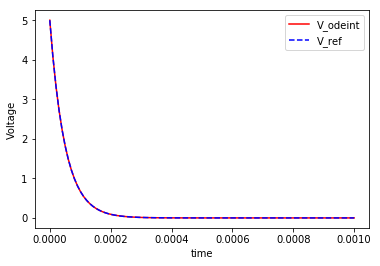

In [5]:
plt.plot(t, V, 'r-', label='V_odeint')
plt.plot(t, V_ref, 'b--', label='V_ref')
plt.xlabel('time')
plt.ylabel('Voltage')
plt.legend()
plt.show()

# Harmonic oscillator

In [2]:
import math

In [3]:
# Solve m * d2x/dt2 = - k * x
# Let y = dx/dt, we get
# (1) dx/dt = y
# (2) dy/dt = -(k/m) * x
k = 1.0
m = 1.0
z0 = [1.,0.]

In [4]:
def model(z, t):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = -(1. * k * x)/m
    return [dxdt, dydt]

In [5]:
t = np.linspace(0, 10, 100)
z = odeint(model, z0, t)
x, y = z[:, 0], z[:, 1] # Solve x(t), dx(t)/dt using odeint

In [6]:
# Solve x(t) analytically
# x(t) = A * cos(w * t + phi)
# Given initial values of x(t), y(t) = z0[0], z0[1], we get
# (1) A * cos(phi) = z0[0]
# (2) -1.0 * A * w * sin(phi) = z0[1]
w = np.sqrt(k/m)
phi = math.atan(-1.0 * z0[1]/(z0[0]*w))
A = z0[0]/math.cos(phi)
x_ref = list(map(lambda item: A * math.cos(w*item + phi), t)) # Analytical solution of V(t)

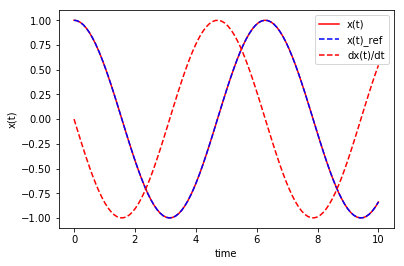

In [7]:
plt.plot(t, x, 'r-', label='x(t)')
plt.plot(t, x_ref, 'b--', label='x(t)_ref')
plt.plot(t, y, 'r--', label='dx(t)/dt')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Non-linear regression with known closed form solution

In [8]:
from scipy.optimize import leastsq

In [9]:
x_data = x.copy() # x_data is experimental data of x(t)
t_data = t.copy() # t_data is experimental data of t

In [11]:
m0 = 1.0
A0 = 1.0
phi0 = 0.0

In [12]:
def fitting(t, param):
    w0 = np.sqrt(param[0]/m0)
    x_t = A0 * np.cos(w0 * t + phi0) # x_t is x(t) 
    return x_t

def error(param, x, t):
    err = x - fitting(t, param)
    return err

In [16]:
k0 = 1.0 # k is the param to be determined, with initial value k0 = 0.0
kbest = leastsq(error,k0,args=(x_data,t_data), full_output=1)
print('best k value is ', kbest[0][0])

best k value is  0.999999954026


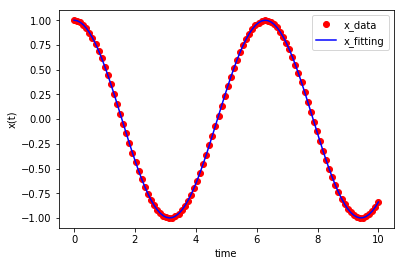

In [17]:
plt.plot(t_data, x_data, 'ro', label='x_data')
x_fitting = fitting(t_data, kbest)
plt.plot(t_data, x_fitting, 'b-', label='x_fitting')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Non-linear regression with odeint

In [23]:
m = 1.0
z0 = [1.,0.]

def model(z, t, param):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = -(1. * param * x)/m
    return [dxdt, dydt]

In [24]:
def fitting_odeint(t, param):
    z = odeint(model, z0, t, args=(param,))
    x, y = z[:, 0], z[:, 1] # Solve x(t), dx(t)/dt using odeint
    return x

def error_odeint(param, x_data, t):
    err = x_data - fitting_odeint(t, param)
    return err

In [25]:
k0 = 0.5 # k is the param to be determined, with initial value k0 = 0.0
kbest = leastsq(error_odeint,k0,args=(x_data,t_data), full_output=1)
print('best k value is ', kbest[0][0])

best k value is  1.0


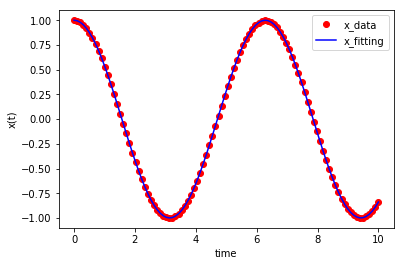

In [26]:
plt.plot(t_data, x_data, 'ro', label='x_data')
x_fitting = fitting_odeint(t_data, kbest[0][0])
plt.plot(t_data, x_fitting, 'b-', label='x_fitting')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Non-linear regression with odeint (multiple params)

In [14]:
# m and k are param to be determined from odeint
# m = param[0]
# k = param[1]
z0 = [1.,0.]

def model(z, t, param):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = -(1. * param[0] * x)/param[1]
    return [dxdt, dydt]

In [15]:
def fitting_odeint(t, param):
    z = odeint(model, z0, t, args=(param,))
    x, y = z[:, 0], z[:, 1] # Solve x(t), dx(t)/dt using odeint
    return x

def error_odeint(param, x_data, t):
    err = x_data - fitting_odeint(t, param)
    return err

In [16]:
param0 = [3., 2.] # initial k, m = 0.5, 2.0
pbest = leastsq(error_odeint,param0,args=(x_data,t_data), full_output=1)
print('Best k value is {}. Best m value is {}'.format(pbest[0][0], pbest[0][1]))

Best k value is 190.4685062027402. Best m value is 190.46850620274049


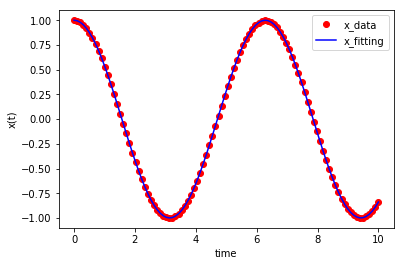

In [17]:
plt.plot(t_data, x_data, 'ro', label='x_data')
x_fitting = fitting_odeint(t_data, pbest[0])
plt.plot(t_data, x_fitting, 'b-', label='x_fitting')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Non-linear regression with odeint (k, x0, dx0dt)

In [18]:
# k, z0[0] and z0[1] are param to be determined from odeint
# k, z0[0] and z0[1] = param[0], param[1], param[2].
m = 1.0

def model(z, t, param):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = -(1. * param[0] * x)/m
    return [dxdt, dydt]

In [19]:
def fitting_odeint(t, param):
    z = odeint(model, param[1:], t, args=(param,))
    x, y = z[:, 0], z[:, 1] # Solve x(t), dx(t)/dt using odeint
    return x

def error_odeint(param, x_data, t):
    err = x_data - fitting_odeint(t, param)
    return err

In [25]:
param0 = [0.5, 0., 1.] # initial k, x, dxdt = 0.5, 1.0, 1.0
pbest = leastsq(error_odeint,param0,args=(x_data,t_data), full_output=1)
print('Best k value is {}'.format(pbest[0][0]))
print('Best x0 value is {}'.format(pbest[0][1]))
print('Best dx0 value is {}'.format(pbest[0][2]))

Best k value is 1.0000103034870513
Best x0 value is 0.9999972768438659
Best dx0 value is 3.1605078624840443e-05


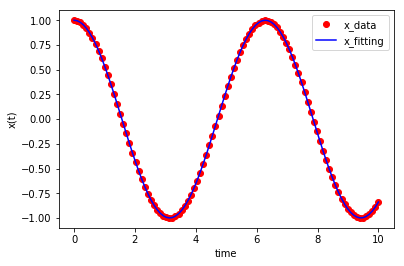

In [26]:
plt.plot(t_data, x_data, 'ro', label='x_data')
x_fitting = fitting_odeint(t_data, pbest[0])
plt.plot(t_data, x_fitting, 'b-', label='x_fitting')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()